epoch 0, erro : 4.882050037384033
epoch 1, erro : 4.112646579742432
epoch 2, erro : 3.367807626724243
epoch 3, erro : 2.6656219959259033
epoch 4, erro : 2.033540964126587
epoch 5, erro : 1.5042295455932617
epoch 6, erro : 1.1000001430511475
epoch 7, erro : 0.8164608478546143
epoch 8, erro : 0.6265944838523865
epoch 9, erro : 0.4995822012424469
epoch 10, erro : 0.4122803807258606
epoch 11, erro : 0.3500232398509979
epoch 12, erro : 0.3039700984954834
epoch 13, erro : 0.2687693238258362
epoch 14, erro : 0.24109649658203125
epoch 15, erro : 0.2188182920217514
epoch 16, erro : 0.20051954686641693
epoch 17, erro : 0.18523183465003967
epoch 18, erro : 0.1722731739282608
epoch 19, erro : 0.16115106642246246
epoch 20, erro : 0.15150167047977448
epoch 21, erro : 0.14305073022842407
epoch 22, erro : 0.13558781147003174
epoch 23, erro : 0.1289488673210144
epoch 24, erro : 0.12300413101911545
epoch 25, erro : 0.11764969676733017
epoch 26, erro : 0.11280141025781631
epoch 27, erro : 0.1083903163671

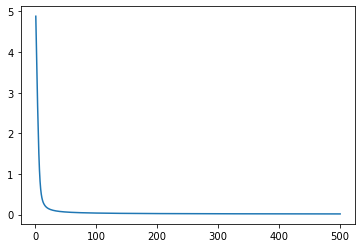

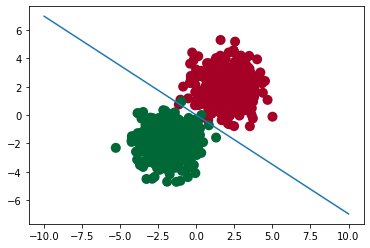

In [2]:
import torch
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def sigmod(z):
    return 1 / (1 + torch.exp(-z))

def model(x,w):
    return sigmod(torch.mm(x,w).squeeze(1))

# w1*x1 + w2*x2 = 0 
def xx2(x1):
    return -w[0].item() * x1 / w[1].item() 
# 定义二分类交叉熵损失函数
def BCELoss(preds, label):
    return -torch.sum(label * torch.log(preds) + (1 - label) * torch.log(1 - preds)) / len(preds)

if __name__ == "__main__":
    n_data = torch.ones(500, 2)  # 数据的基本形态
    # 从二维高斯分布中取值，有两个均值，分别为[2,2]
    x1 = torch.normal(2 * n_data, 1)
    y1 = torch.zeros(500)  # 类型0
    x2 = torch.normal(-2 * n_data, 1)  # 类型1
    y2 = torch.ones(500)  # 类型1 shape=(500, 1)
    # 注意 x, y 数据的数据形式一定要像下面一样 (torch.cat 是合并数据)
    x = torch.cat((x1, x2), 0).type(torch.FloatTensor)
    y = torch.cat((y1, y2), 0).type(torch.FloatTensor)

    # plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
    # plt.show()
    X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True)

    w = torch.tensor(np.random.normal(0, 1, (2, 1)), dtype=torch.float32)
    w.requires_grad_(requires_grad=True)
    epochs = 500
    lr = 0.1
    losses = []
    for i in range(epochs):
        preds = model(X_train, w)
        loss = BCELoss(preds, y_train)
        losses.append(loss.item())
        # 计算梯度
        loss.backward()
        # 更新参数w
        w.data -= lr * w.grad
        # 清空梯度
        w.grad.data.zero_()
        print("epoch {}, erro : {}".format(i, loss))

    test = model(X_test, w)
    test = test.detach()
    test[test >= 0.5] = 1
    test[test < 0.5] = 0
    print("accuracy：")
    print(torch.sum(test == y_test).item() / len(y_test))
    
    #绘制loss曲线
    x_label = np.arange(1,epochs+1)
    plt.plot(x_label,losses)
    plt.show()

    #绘制图像
    x_plot = np.linspace(-10,10,10)
    y_plot = xx2(x_plot)
    
    plt.plot(x_plot,y_plot)
    plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
    plt.show()